# 1. Determinant

In [ ]:
import numpy as np

def determinant(matrix):
    if len(matrix.shape) != 2 or matrix.shape[0] != matrix.shape[1] :
        raise ValueError(f'matrix is empty or not square')
    if matrix.shape[0] == 1:
        return matrix[0][0]
    elif matrix.shape[0] == 2:
        return matrix[0, 0]*matrix[1, 1] - matrix[0, 1]*matrix[1, 0] 
    elif matrix.shape[0] == 3:
        sum = 0
        for i in range(3):
            submatrix = np.zeros(shape=(2,2))
            submatrix[0,0] = matrix[1, (i+1) % 3]
            submatrix[0,1] = matrix[1, (i+2) % 3]
            submatrix[1,0] = matrix[2, (i+1) % 3]
            submatrix[1,1] = matrix[2, (i+2) % 3]
            det = determinant(submatrix)
            #print(f"submatrix=\n{submatrix},\nDeterminant={det}")
            sum += det * matrix[0, i]
        return sum
    else:
        raise ValueError(f'Not implemented for matrix size greater than 3x3')

# test
matrix = np.zeros(shape=(2,2))
matrix[0, 0],matrix[0, 1] = 1, -2
matrix[1, 0],matrix[1, 1] = 2, 3
print(f"Matrix=\n{matrix},\nDeterminant={determinant(matrix)}")
matrix = np.zeros(shape=(3,3))
matrix[0, 0], matrix[0, 1], matrix[0, 2] = 1, -2, 4
matrix[1, 0], matrix[1, 1], matrix[1, 2] = 2, 3, -5
matrix[2, 0], matrix[2, 1], matrix[2, 2] = 1, -2, 3
print(f"Matrix=\n{matrix},\nDeterminant={determinant(matrix)}")


Matrix=
[[ 1. -2.]
 [ 2.  3.]],
Determinant=7.0
Matrix=
[[ 1. -2.  4.]
 [ 2.  3. -5.]
 [ 1. -2.  3.]],
Determinant=-7.0


# 2. Gram–Schmidt algorithm

In [36]:
def dot_product(vector1, vector2):
    if vector1.shape != (3, 1) or vector2.shape != (3, 1):
        raise ValueError(f'Invalid shape of vectors!')
    return vector1[0, 0]*vector2[0, 0] +\
        vector1[1, 0]*vector2[1, 0] +\
        vector1[2, 0]*vector2[2, 0]

def check_orthogonal(vector1, vector2, vector3):
    if vector1.shape != (3, 1) or vector2.shape != (3, 1) or vector3.shape != (3, 1):
        raise ValueError(f'Invalid shape of vectors!')
    matrix = np.hstack((vector1, vector2, vector3))
    det = determinant(matrix)
    return det != 0

def gram_schmidt(vector1, vector2, vector3):
    print(f'Vectors:\n{vector1},\n{vector2},\n{vector3}')

    if vector1.shape != (3, 1) or vector2.shape != (3, 1) or vector3.shape != (3, 1):
        raise ValueError(f'Invalid shape of vectors!')
    ortho = check_orthogonal(vector1, vector2, vector3)
    if not ortho:
        raise ValueError(f"The vectors are linearly dependent")
    else:
        print(f"The vectors are linearly independent")

    w1 = vector1
    w1_mod = dot_product(w1, w1)
    w2 = vector2 - (dot_product(vector2, w1) / w1_mod)*w1
    w2_mod = dot_product(w2, w2)
    w3 = vector3 - (dot_product(vector3, w1) / w1_mod)*w1 - (dot_product(vector3, w2) / w2_mod)*w2

    return (w1, w2, w3)


vector1 = np.array([2, 2, 3]).reshape(-1,1)
vector2 = np.array([2, 5, 6]).reshape(-1,1)
vector3 = np.array([-1, 2, 9]).reshape(-1,1)
w1, w2, w3 = gram_schmidt(vector1, vector2, vector3)
print(f'Gram-Schmidt vectors:\n{w1},\n{w2},\n{w3}')
ortho = check_orthogonal(w1, w2, w3)
if not ortho:
    raise ValueError(f"The Gram-Schmidt vectors are linearly dependent!")
else:
    print(f"The Gram-Schmidt vectors are linearly independent")



Vectors:
[[2]
 [2]
 [3]],
[[2]
 [5]
 [6]],
[[-1]
 [ 2]
 [ 9]]
The vectors are linearly independent
Gram-Schmidt vectors:
[[2]
 [2]
 [3]],
[[-1.76470588]
 [ 1.23529412]
 [ 0.35294118]],
[[-1.66666667]
 [-3.33333333]
 [ 3.33333333]]
The Gram-Schmidt vectors are linearly independent


# 3. Estimate Pi

In [41]:
def estimate_pi(n=100):
    inside_circle = 0
    for i in range(n):
        x = -0.5 + np.random.random()
        y = -0.5 + np.random.random()
        r = np.sqrt(x*x + y*y)
        if r < 0.5: inside_circle += 1

    return inside_circle * 4/ n

# test
for n in [int(1e3), int(1e4), int(1e5), int(1e6), int(1e7)]:
    print(f'n={n}, pi={estimate_pi(n)}')


n=1000, pi=3.02
n=10000, pi=3.1448
n=100000, pi=3.14808
n=1000000, pi=3.14076
n=10000000, pi=3.1410336


# 4. Code reading

## i: 
prints the first column of matri (1, -1), then prints the second column of the matrix (1, 1).
## ii: 
Error due to accessing array element out of bounds! The code tries to access (i+1) index. It will fail on the last row of the matrix.
## iii: 
The last reshape command will fail as 5*3 is not equal to 16



# Challenge: Ising model and Metropolis algorithm

Metrolpolis: T=0.0001, E=-9, reject_count=99988
Metrolpolis: T=0.001, E=-9, reject_count=99933
Metrolpolis: T=0.01, E=-9, reject_count=99996
Metrolpolis: T=0.1, E=-9, reject_count=99886
Metrolpolis: T=1.0, E=-9, reject_count=76426
Metrolpolis: T=10.0, E=-1, reject_count=10116
Metrolpolis: T=100.0, E=1, reject_count=978
Metrolpolis: T=1000.0, E=3, reject_count=104
Metrolpolis: T=10000.0, E=1, reject_count=12
Metrolpolis: T=100000.0, E=-7, reject_count=1


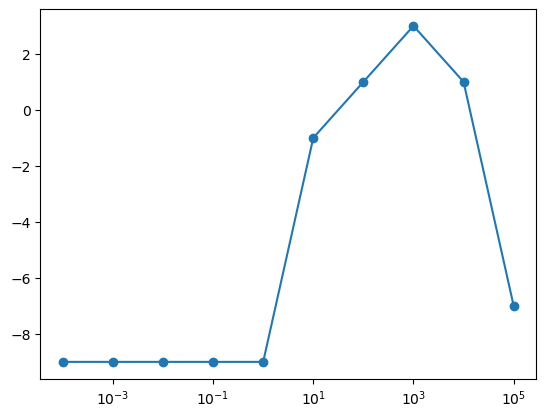

In [61]:
def energy(state, J):
    sum = 0
    for i in range(len(state) - 1):
        sum += state[i]*state[i+1]
    return -J*sum

def metropolis(T, iter=100000, N=10, J=1):
    state = np.random.choice([1, -1], size=N)
    kbT = T
    reject_count = 0
    E = energy(state, J)
    stats = {'E': np.zeros(shape=(iter)), 'reject_count':  np.zeros(shape=(iter))}
    for i in range(iter):    
        flip_index = np.random.randint(0, N)
        state[flip_index] *= -1
        E1 = energy(state, J)
        delta_E = E1-E
        accept = False
        if delta_E < 0:
            accept = True
        else:
            accept_threshold = np.exp(-delta_E/kbT)
            if np.random.random() < accept_threshold:
                accept = True
        if not accept:
            state[flip_index] *= -1
            reject_count += 1
        else:
            E = E1
        stats['reject_count'][i] = reject_count
        stats['E'][i] = E
    
    return stats, state, E, reject_count

#  test
import matplotlib.pyplot as plt

avg_E = []
temperatures = [1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 1e2, 1e3, 1e4, 1e5]
for T in temperatures:
    stats, state, E, reject_count = metropolis(T)
    print(f'Metrolpolis: T={T}, E={E}, reject_count={reject_count}')
    avg_E.append(E)
    #plt.plot(stats['E'])
    #plt.show()

plt.plot(temperatures, avg_E, marker='o')
plt.xscale('log')
plt.show()